Importing Necessary Libraries:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import numpy as np

Loading MNIST Dataset from tensorflow keras and Storing in train , test splited form.
X_train and y_train used for train dataset and its label,
X_test and y_test used for test dataset.


In [ ]:
(x_train, y_train), (x_test, y_test)  = tf.keras.datasets.mnist.load_data() #loading mnist data

11490434/11490434 [==============================] - 0s 0us/step


Showing First 9 sample image of train dataset using matplotlib with corresponding label as image title

Train Datset Shape: (60000, 28, 28) , Test Dataset Shape: (10000, 28, 28)

First 9 Samples:


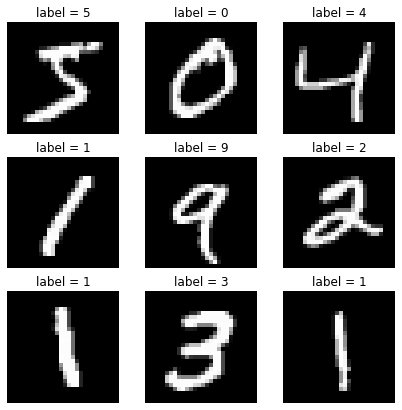

In [ ]:
print("Train Datset Shape: {} , Test Dataset Shape: {}\n".format(x_train.shape , x_test.shape))

#plotting first 9 images and label
print("First 9 Samples:")
plt.figure(figsize = (7,7))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i] , cmap = 'gray') # show the image
  plt.title("label = " + str(y_train[i])) # label of the image as image title
  plt.axis('off')

plt.show()

Dataset Resahape using Numpy module

In [ ]:
# Reshape the input data to 4D tensor (batch_size, height, width, channels)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [ ]:
# Convert the input data to float32 and normalize it to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert the target output to categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(x_train[0].shape , x_test[0].shape , x_train.shape)

(28, 28, 1) (28, 28, 1) (60000, 28, 28, 1)


Data Augmentation Using ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,  # rotate the image up to 10 degrees
    width_shift_range=0.1,  # shift the image horizontally up to 10% of the width
    height_shift_range=0.1,  # shift the image vertically up to 10% of the height
    shear_range=0.2,  # shear the image up to 20%
    zoom_range=0.2,  # zoom the image up to 20%
    fill_mode='nearest'  # fill any empty pixels with the nearest pixel value
)

In [ ]:
#Define the model architecture
model = Sequential()

#Add layers
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1))) # Add Convolution layer
model.add(MaxPooling2D((2,2))) # Add MaxPooling layer
model.add(Flatten()) #Add Flatten layer
model.add(Dense(units = 128 , activation = 'relu')) #fully connected hidden layer , units = 128
model.add(Dense(units = 64 , activation = 'relu')) #fully connected hidden layer , units = 64
model.add(Dense(units = 32 , activation = 'relu')) #fully connected hidden layer , units = 32
model.add(Dense(units = 10 , activation = 'softmax')) #fully connected output layer , units = 10

#Compile the model
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['acc'])

In [ ]:
# Generate augmented images on the fly during training
datagen.fit(x_train)
train_generator = datagen.flow(x_train, y_train, batch_size=32)

First 9 Samples:


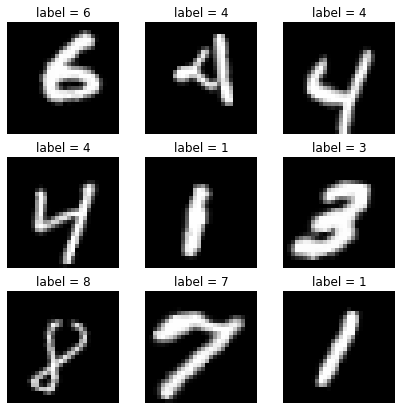

In [ ]:
#plotting first 9 images and label
print("First 9 Samples:")
plt.figure(figsize = (7,7))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_generator[i][0][0] , cmap = 'gray') # show the image
  plt.title("label = " + str(np.argmax(train_generator[i][1][0]))) # label of the image as image title
  plt.axis('off')

plt.show()

In [ ]:
# Train the model using the augmented images
model.fit(train_generator,
          steps_per_epoch=len(x_train) // 32,
          epochs=10)

In [ ]:
#Test the Augmented model without augmentation of test data
history = model.evaluate(x_test , y_test , verbose = 0)
acc = history[1] * 100;

print("Accuracy of augmented model: %.2f" % acc,"%")

Accuracy of augmented model without test data Augmentation: 98.80 %
